# Medical Cost Personal Insurance Project


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

import joblib

import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


# EDA (Exploratory Data Analysis)

In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

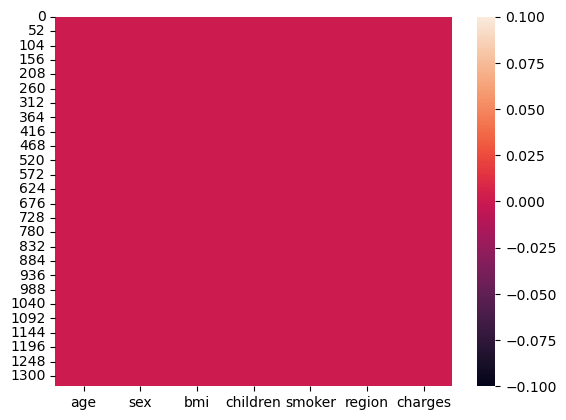

In [12]:
sns.heatmap(df.isnull())

In [13]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [14]:
df['bmi'].nunique()

548

In [15]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1}
             }
df.replace(clean_data,inplace=True)

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


0    676
1    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


0    1064
1     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
         

In [17]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
#seprating the Categorical data and Numerical data

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        
        categorical_col.append(i)
print("Categorical Columns :",categorical_col)
print('\n')
   


numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        
        numerical_col.append(i)
print("Numerical Columns :",numerical_col)
    

Categorical Columns : ['region']


Numerical Columns : ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']


In [20]:
df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


These are the unique values present in the dataset. here we can see this there is a region columns which contains only names so we don't need for this column so we can drop it 

In [21]:
df.drop('region',axis =1,inplace = True)

In [22]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [23]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
charges     float64
dtype: object

In [24]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

Here we can assume this 0 stands for who are not smoker and 1 whe is smoker 

# Discription of the Dataset

In [25]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Data Visualization

0    1064
1     274
Name: smoker, dtype: int64


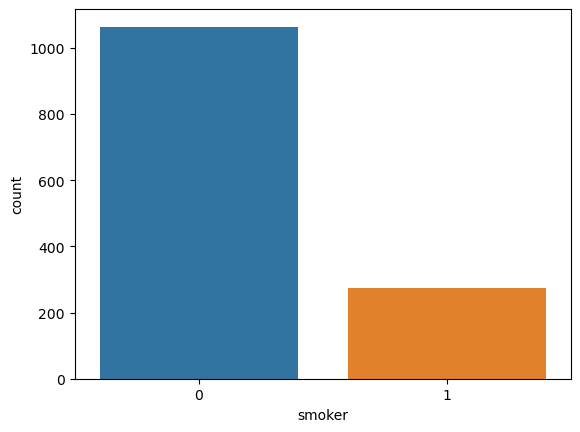

In [26]:
ax  = sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

0    676
1    662
Name: sex, dtype: int64


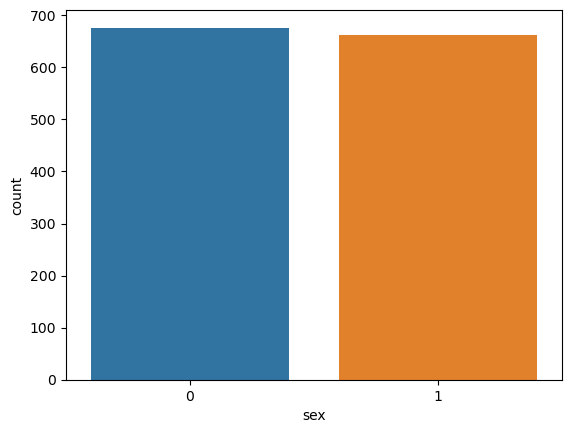

In [27]:
ax  = sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


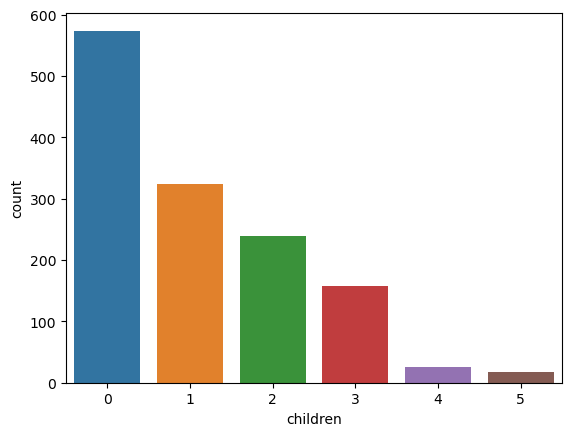

In [28]:
ax  = sns.countplot(x='children',data=df)
print(df['children'].value_counts())

Text(0, 0.5, 'Count')

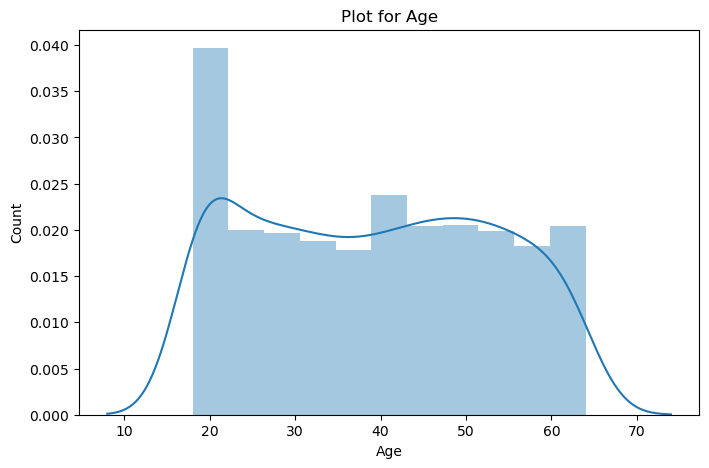

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

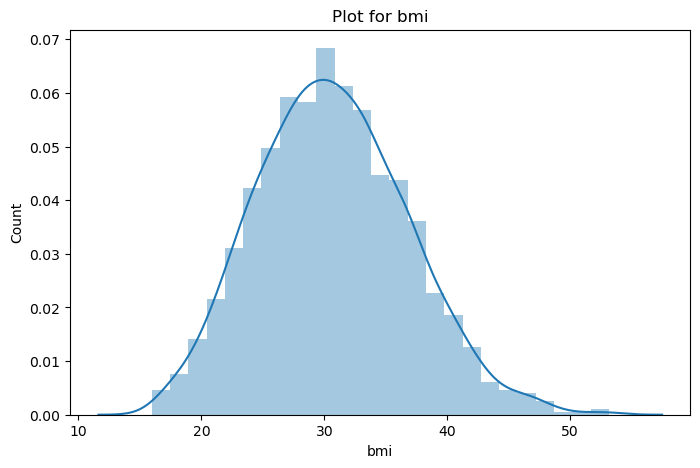

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(df['bmi'])
plt.title('Plot for bmi')
plt.xlabel('bmi')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

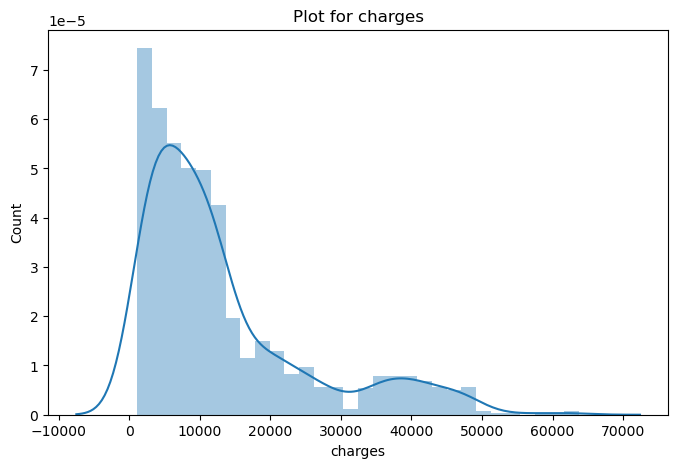

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

Text(0.5, 1.0, 'BMI VS Charge')

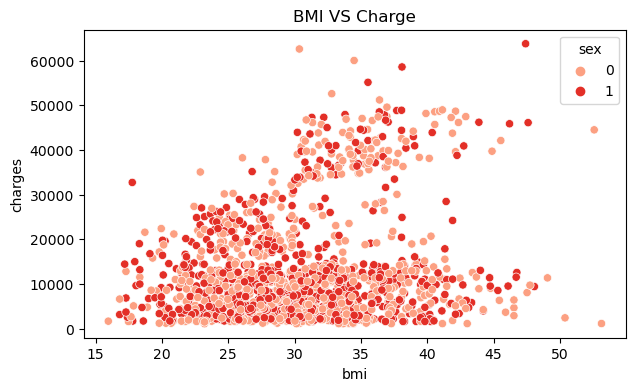

In [32]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')


<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

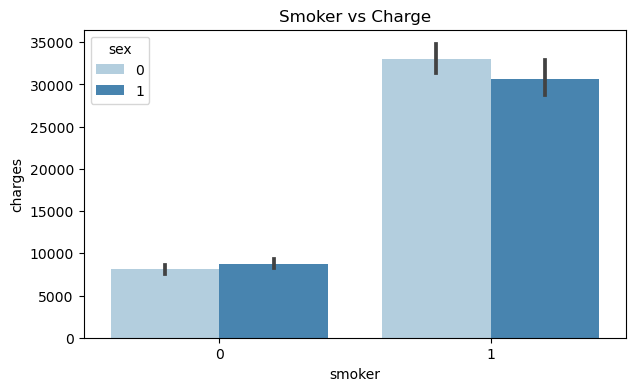

In [33]:
plt.figure(figsize=(7,4))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

<Axes: title={'center': 'Sex vs Charge'}, xlabel='sex', ylabel='charges'>

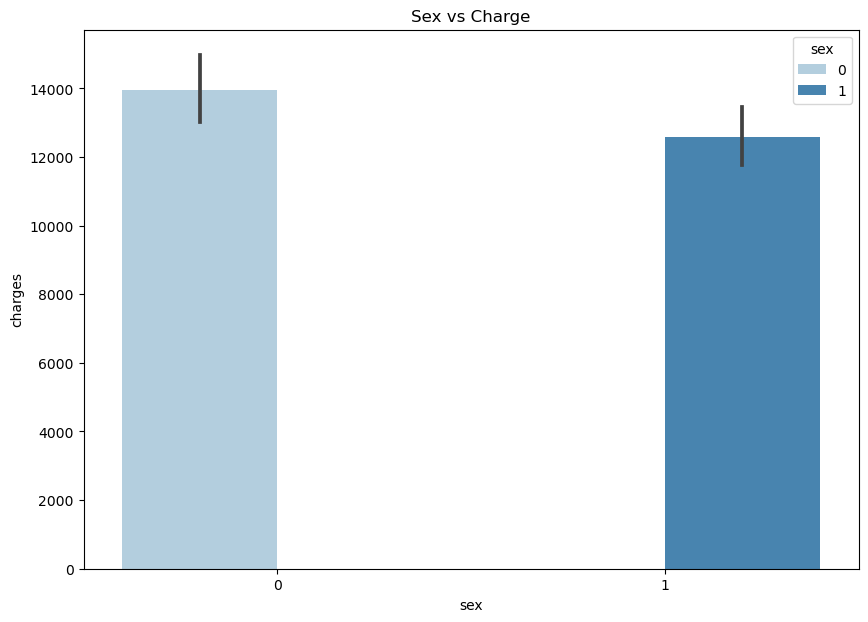

In [34]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',data=df,palette='Blues',hue='sex')

In [35]:
data = df.copy()
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [36]:
Bmi = data.bmi
Bmi = Bmi.values.reshape(-1,1)
data['bmi'] = StandardScaler().fit_transform(Bmi)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,-0.453320,0,1,16884.92400
1,18,0,0.509621,1,0,1725.55230
2,28,0,0.383307,3,0,4449.46200
3,33,0,-1.305531,0,0,21984.47061
4,32,0,-0.292556,0,0,3866.85520


In [37]:
Age = data.age
Age = Age.values.reshape(-1,1)
data['age'] = StandardScaler().fit_transform(Age)
data.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,1,-0.453320,0,1,16884.92400
1,-1.509965,0,0.509621,1,0,1725.55230
2,-0.797954,0,0.383307,3,0,4449.46200
3,-0.441948,0,-1.305531,0,0,21984.47061
4,-0.513149,0,-0.292556,0,0,3866.85520


In [38]:
Charges = data.charges
Charges = Charges.values.reshape(-1,1)
data['charges'] = StandardScaler().fit_transform(Charges)
data.head()

,age,sex,bmi,children,smoker,charges
0,-1.438764,1,-0.453320,0,1,0.298584
1,-1.509965,0,0.509621,1,0,-0.953689
2,-0.797954,0,0.383307,3,0,-0.728675
3,-0.441948,0,-1.305531,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,-0.776802


# Now i am going to split the data into two variables named as X and Y

In [39]:
X = data.drop('charges', axis=1).values
Y = data['charges'].values.reshape(-1,1)

In [40]:
Y

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

# Creating the training and testing Datasets

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [42]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(1070, 5)
(1070, 1)
(268, 5)
(268, 1)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [44]:
%%time
model = LinearRegression()
model.fit(X_train,Y_train)

CPU times: total: 0 ns
Wall time: 4 ms


LinearRegression()

In [45]:
cv_linear_reg = cross_val_score(estimator = model, X = X, y=Y, cv = 10)

y_pred_train = model.predict(X_train)
r2_score_train = r2_score(Y_train, y_pred_train)

y_pred_linear_test = model.predict(X_test)
r2_score_test = r2_score(Y_test, y_pred_linear_test)

rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.744
R2_score (train) : 0.741
R2_score (test) : 0.781
RMSE : 0.482


# Support vector Regressor

In [46]:
X_a = df.drop('charges',axis=1).values
y_a = df['charges'].values.reshape(-1,1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a,y_a,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_a)
Y_train_scaled = StandardScaler().fit_transform(y_train_a)
X_test_scaled = StandardScaler().fit_transform(X_test_a)
Y_test_scaled = StandardScaler().fit_transform(y_test_a)

svr = SVR()

In [49]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, Y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(C=10, gamma=0.1, tol=0.0001), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [50]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, Y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)



cv_svr = svr_grid.best_score_

y_pred_train = svr.predict(X_train_scaled)
r2_score_train = r2_score(Y_train_scaled, y_pred_train)

y_pred_test = svr.predict(X_test_scaled)
r2_score_test = r2_score(Y_test_scaled, y_pred_test)

rmse_svr = (np.sqrt(mean_squared_error(Y_test_scaled, y_pred_test)))

print('\n\nCV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

SVR(C=1, gamma=0.1, tol=0.0001)
0.8350205492327785


CV : 0.835
R2_score (train) : 0.849
R2 score (test) : 0.873
RMSE : 0.356


# Random Forest Regressor

In [58]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, Y_train_scaled.ravel())

reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_


rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, Y_train_scaled.ravel())


CPU times: total: 6.55 s
Wall time: 7min 34s


RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [59]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(Y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(Y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.846
R2 score (train) : 0.882
R2 score (test) : 0.879
RMSE : 0.348


In [61]:
models = [('Linear Regression', rmse_linear, r2_score_train, r2_score_test, cv_linear_reg.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_train, r2_score_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [62]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.481532,0.849065,0.872939,0.744199
1,Support Vector Regression,0.356456,0.849065,0.872939,0.835021
2,Random Forest Regression,0.348300,0.881716,0.878687,0.846484


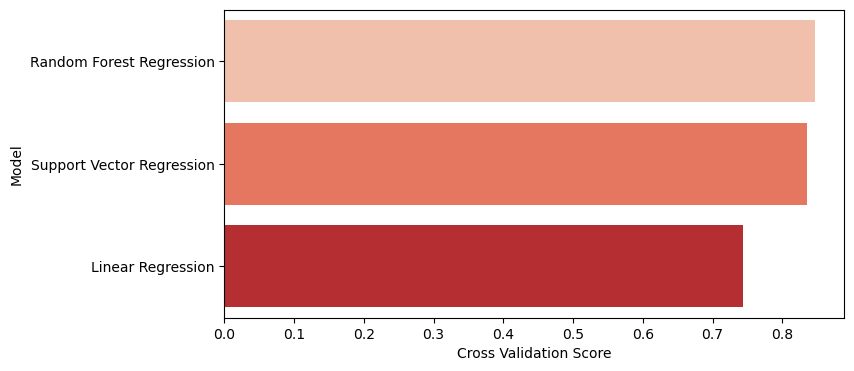

In [64]:
plt.figure(figsize=(8,4))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()